# Cross Validation

In [1]:
%load_ext autoreload
%autoreload 2


from tdm.raw.breast_mibi import read_single_cell_df
from tdm.model.selection import cross_validation2, plot_cross_validation_result
from tdm.cell_types import FIBROBLAST, MACROPHAGE, TUMOR, ENDOTHELIAL

single_cell_df = read_single_cell_df()

Define the settings to compare by constructing a dictionary that maps a setting name, to kwargs for the model and feature transforms:

In [13]:
setting_dicts = {
    'degree 2': {
        'model_kwargs': {}, # see: LogisticRegressionModel for more options such as regularization
        'polynomial_dataset_kwargs': {'degree': 2} # see: PolynomialDataset for more  feature transformations
    },
    'degree 1': {
        'model_kwargs': {},
        'polynomial_dataset_kwargs': {'degree': 1},
    }
}

Run the cross validation (note: partitions the dataset at the level of tissues, not cells)

In [14]:
res = cross_validation2(
    single_cell_df, 
    model_dicts=setting_dicts,
    cell_types_to_model=[FIBROBLAST, MACROPHAGE],
    allowed_neighbor_types=[FIBROBLAST, MACROPHAGE, TUMOR, ENDOTHELIAL],
    neighborhood_mode='extrapolate',
    n_splits=3
)

100%|██████████| 3/3 [00:03<00:00,  1.29s/it]


Plot the result:

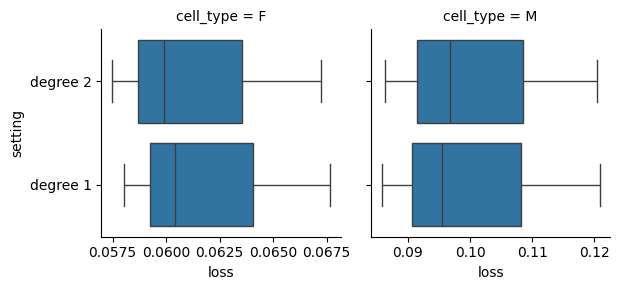

In [15]:
plot_cross_validation_result(res)

There are no major differences over the settings above, for simplicity we can take the best performing model on average over all cell types:

In [16]:
res.groupby('setting').loss.mean().sort_values()

setting
degree 2    0.081324
degree 1    0.081365
Name: loss, dtype: float64